In [1]:
import joblib
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
model = joblib.load("../models/logreg_model.pkl")
vectorizer = joblib.load("../models/tfidf_vectorizer.pkl")
encoder = joblib.load("../models/label_encoder.pkl")


In [4]:
df = pd.read_csv("../data/processed/sentiment140_clean.csv")
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

df = df.dropna(subset=["clean_text"]).reset_index(drop=True)

X = vectorizer.transform(df["clean_text"])
y = encoder.transform(df["sentiment"])


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, df_train, df_test = train_test_split(
    X, y, df, test_size=0.2, stratify=y, random_state=42)


In [6]:
y_pred = model.predict(X_test)


In [7]:
df_test = df_test.copy()
df_test["true"] = encoder.inverse_transform(y_test)
df_test["pred"] = encoder.inverse_transform(y_pred)
df_test["correct"] = df_test["true"] == df_test["pred"]


In [8]:
report = classification_report(y_test, y_pred, target_names=encoder.classes_, output_dict=True)
pd.DataFrame(report).T


,precision,recall,f1-score,support
negative,0.801626,0.766721,0.783785,159247.000000
positive,0.776383,0.810200,0.792931,159194.000000
accuracy,0.788457,0.788457,0.788457,0.788457
macro avg,0.789004,0.788461,0.788358,318441.000000
weighted avg,0.789007,0.788457,0.788357,318441.000000


In [9]:
pd.crosstab(df_test["true"], df_test["pred"], normalize='index')


pred,negative,positive
true,,
negative,0.766721,0.233279
positive,0.189800,0.810200


In [10]:
misclassified = df_test[~df_test["correct"]]


In [11]:
misclassified.sample(10)[["clean_text", "true", "pred"]]


,clean_text,true,pred
470198,looked intently exersaucer raised closed fist ...,positive,negative
1321008,type back,negative,positive
987716,slow weekend ready take week,positive,negative
1321196,bachelorette sadddddddd wes still liked jake,negative,positive
348949,actually new lesson plan changin book,negative,positive
27106,crappy,positive,negative
432322,took way longer home making dino nugget,positive,negative
869304,ill twitter wme tho ipod,positive,negative
1509294,go back later buy u,negative,positive
594122,rgamethi live account,negative,positive


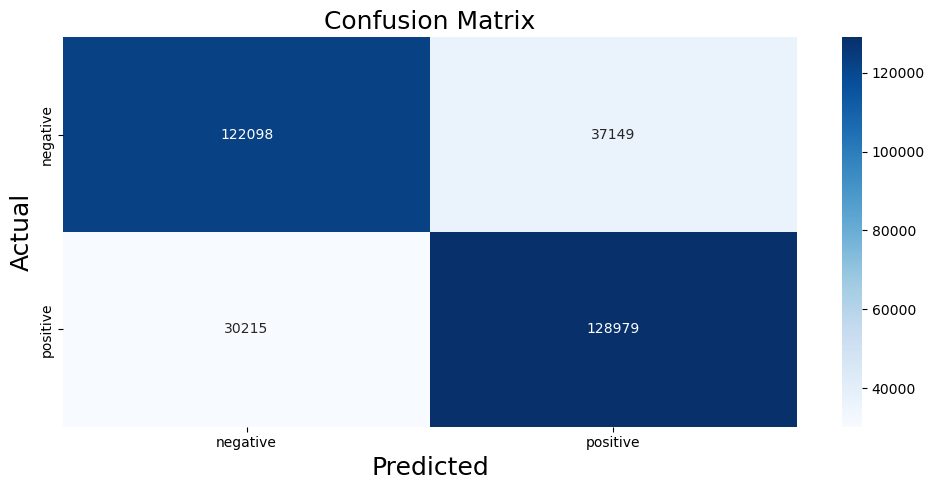

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=np.arange(len(encoder.classes_)))

plt.figure(figsize=(10, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel("Predicted", fontsize=18)
plt.ylabel("Actual", fontsize=18)
plt.title("Confusion Matrix", fontsize=18)
plt.tight_layout()
plt.show()
